<a href="https://colab.research.google.com/github/Venkats-AI-codes/AI_practices/blob/main/Divisive_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
X, _ = make_blobs(n_samples=30, centers=5, cluster_std=10, random_state=42)
X

array([[-11.58943838,  -5.10875089],
       [ -7.14337455,   4.35698859],
       [  0.50503861,  -5.16642678],
       [ -1.36650806,  -0.94376781],
       [  5.31516088, -12.27431218],
       [-20.16148768,  -4.91149723],
       [ -8.03611002,  -9.89114655],
       [ -5.40214486, -10.30687864],
       [  1.47166747,  16.63632411],
       [ -6.369875  ,   1.0693278 ],
       [ -1.37718729,  20.49595153],
       [-19.75837595,   3.39141084],
       [  5.33493455,  13.91690283],
       [ -5.59748806,   3.47270011],
       [-23.62354766,   0.12508083],
       [ -2.76944214,   2.30486179],
       [ -7.01459944, -17.45721888],
       [ -6.87005694,   5.73014987],
       [-13.44471547,  17.89474518],
       [ 10.14755846,  17.72385184],
       [ -0.80394841,   3.08239558],
       [ 19.29636653,  -0.28459332],
       [ -9.04104951,  -7.80061468],
       [-15.60754776,  13.4402858 ],
       [  1.30219902,  14.19678053],
       [ -7.20394148,  14.43988656],
       [ -0.08957491, -10.11851632],
 

In [12]:
def divisive_clustering(data, max_clusters=3):
  clusters = [data]
  while len(clusters) < max_clusters:
      cluster_to_split = max(clusters, key=lambda x: len(x))
      clusters.remove(cluster_to_split)

      kmeans = KMeans(n_clusters=2, random_state=42).fit(cluster_to_split)
      cluster1 = cluster_to_split[kmeans.labels_ == 0]
      cluster2 = cluster_to_split[kmeans.labels_ == 1]

      clusters.extend([cluster1, cluster2])
  return clusters


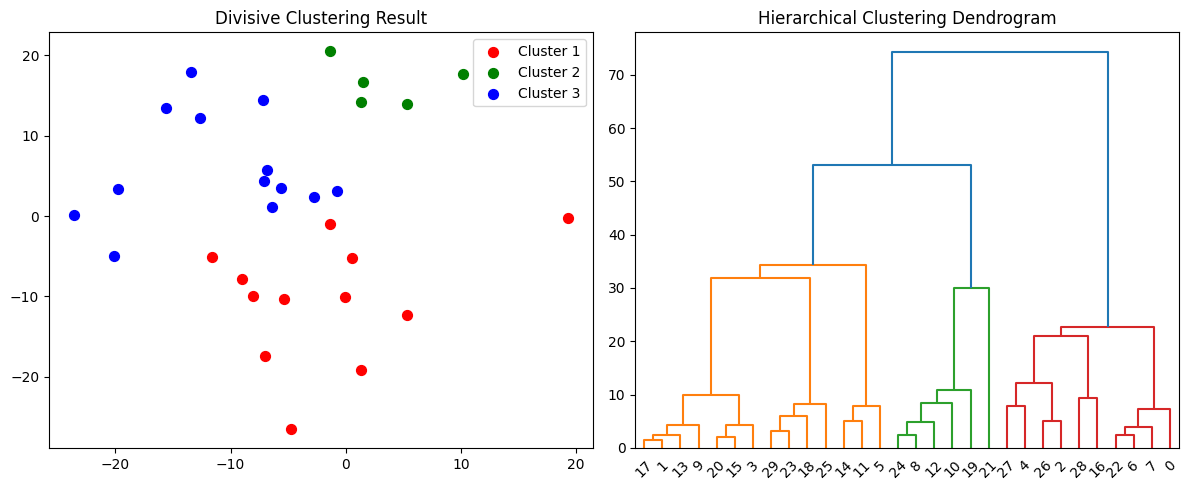

In [13]:
clusters = divisive_clustering(X, max_clusters=3)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50,
                c=colors[i], label=f'Cluster {i+1}')
plt.title('Divisive Clustering Result')
plt.legend()

linked = linkage(X, method='ward')

plt.subplot(1, 2, 2)
dendrogram(linked, orientation='top',
           distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')

plt.tight_layout()
plt.show()